Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 64 rows, 91 columns and 204 nonzeros
Model fingerprint: 0x402f504b
Model has 30 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 30 rows and 33 columns
Presolve time: 0.02s
Presolved: 34 rows, 58 columns, 134 nonzeros
Presolved model has 28 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.200e+01
 Factor NZ  : 3.060e+02
 Factor Ops : 3.570e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective             

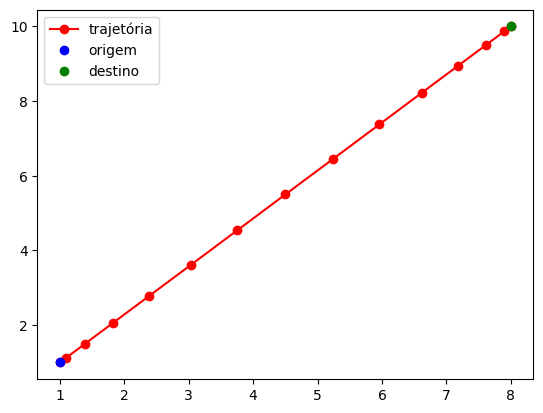

In [1]:
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt

# ---------------------------
# Modelo de Otimização
# ---------------------------
mdl = Model("LPCnLimitado")

# Parâmetros do problema
deltaT = 1.0   # passo de tempo
m = 2.0        # massa do veículo

# Rótulos de instantes de tempo (waypoints)
times = [str(i) for i in range(15)]
nWP = len(times) - 1  # último waypoint (destino)

# ---------------------------
# Variáveis de decisão
# ---------------------------
x  = mdl.addVars(times, name="x")                    # posição em x
y  = mdl.addVars(times, name="y")                    # posição em y
vx = mdl.addVars(times, lb=-1, ub=1, name="vx")      # velocidade em x
vy = mdl.addVars(times, lb=-1, ub=1, name="vy")      # velocidade em y
Fx = mdl.addVars(times, lb=-1, ub=1, name="Fx")      # força em x
Fy = mdl.addVars(times, lb=-1, ub=1, name="Fy")      # força em y
obj = mdl.addVar(name="obj")

# ---------------------------
# Restrições de dinâmica
# ---------------------------
for t in range(nWP):  # até o penúltimo waypoint
    t_curr = times[t]
    t_next = times[t+1]

    # Posição
    mdl.addConstr(
        x[t_next] == x[t_curr] + vx[t_curr]*deltaT + 0.5*(deltaT**2)*Fx[t_curr]/m,
        name=f"xpos_{t}"
    )
    mdl.addConstr(
        y[t_next] == y[t_curr] + vy[t_curr]*deltaT + 0.5*(deltaT**2)*Fy[t_curr]/m,
        name=f"ypos_{t}"
    )

    # Velocidade
    mdl.addConstr(
        vx[t_next] == vx[t_curr] + deltaT*Fx[t_curr]/m,
        name=f"vx_{t}"
    )
    mdl.addConstr(
        vy[t_next] == vy[t_curr] + deltaT*Fy[t_curr]/m,
        name=f"vy_{t}"
    )

# ---------------------------
# Restrições de posição inicial
# ---------------------------
mdl.addConstr(x[times[0]] == 1, name="x0")
mdl.addConstr(y[times[0]] == 1, name="y0")
mdl.addConstr(vx[times[0]] == 0, name="vx0")
mdl.addConstr(vy[times[0]] == 0, name="vy0")

# ---------------------------
# Restrições de posição final (objetivo)
# ---------------------------
mdl.addConstr(x[times[nWP]] == 8, name="x_goal")
mdl.addConstr(y[times[nWP]] == 10, name="y_goal")
mdl.addConstr(vx[times[nWP]] == 0, name="vx_goal")
mdl.addConstr(vy[times[nWP]] == 0, name="vy_goal")

# ---------------------------
# Função Objetivo
# ---------------------------
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(
    quicksum(Fx[t]*Fx[t] + Fy[t]*Fy[t] for t in times)
)

# ---------------------------
# Resolução do Modelo
# ---------------------------
mdl.optimize()

# ---------------------------
# Extração de resultados
# ---------------------------
traj_x = [x[t].X for t in times]
traj_y = [y[t].X for t in times]
forces = [(Fx[t].X, Fy[t].X) for t in times]

print("Trajetória em X:", traj_x)
print("Trajetória em Y:", traj_y)
print("Forças:", forces)

# ---------------------------
# Plotagem da trajetória
# ---------------------------
plt.plot(traj_x, traj_y, "-ro", label="trajetória")
plt.plot(1, 1, "bo", label="origem")      # origem em azul
plt.plot(8, 10, "go", label="destino")    # destino em verde
plt.legend()
plt.show()


Número de waypoints: 11
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 100 rows, 73 columns and 258 nonzeros
Model fingerprint: 0x7448744f
Model has 24 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 9e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 7e+01]
Presolve removed 66 rows and 35 columns
Presolve time: 0.01s
Presolved: 34 rows, 38 columns, 188 nonzeros
Presolved model has 22 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.800e+02
 Factor NZ  : 4.030e+02
 Factor Ops : 5.813e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

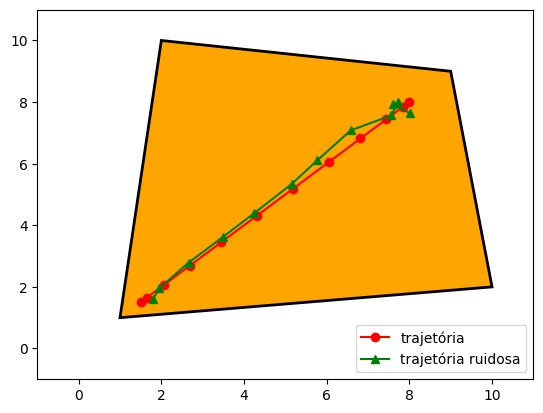

In [2]:
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from numpy import random

# ---------------------------
# Modelo de Otimização
# ---------------------------
mdl = Model("LPCLimitado")

# Parâmetros
deltaT = 1.0   # passo de tempo
m = 2.0        # massa

# Rótulos de instantes de tempo (waypoints)
times = [str(i) for i in range(12)]
nWP = len(times) - 1
print("Número de waypoints:", nWP)

# ---------------------------
# Variáveis de decisão
# ---------------------------
x  = mdl.addVars(times, name="x")
y  = mdl.addVars(times, name="y")
vx = mdl.addVars(times, lb=-1, ub=1, name="vx")
vy = mdl.addVars(times, lb=-1, ub=1, name="vy")
Fx = mdl.addVars(times, lb=-1, ub=1, name="Fx")
Fy = mdl.addVars(times, lb=-1, ub=1, name="Fy")
obj = mdl.addVar(name="obj")

# ---------------------------
# Restrições de dinâmica
# ---------------------------
for t in range(nWP):
    t_curr, t_next = times[t], times[t+1]

    # Posição
    mdl.addConstr(
        x[t_next] == x[t_curr] + vx[t_curr]*deltaT + 0.5*(deltaT**2)*Fx[t_curr]/m,
        name=f"xpos_{t}"
    )
    mdl.addConstr(
        y[t_next] == y[t_curr] + vy[t_curr]*deltaT + 0.5*(deltaT**2)*Fy[t_curr]/m,
        name=f"ypos_{t}"
    )

    # Velocidade
    mdl.addConstr(
        vx[t_next] == vx[t_curr] + deltaT*Fx[t_curr]/m,
        name=f"vx_{t}"
    )
    mdl.addConstr(
        vy[t_next] == vy[t_curr] + deltaT*Fy[t_curr]/m,
        name=f"vy_{t}"
    )

# ---------------------------
# Restrições de posição inicial
# ---------------------------
mdl.addConstr(x[times[0]] == 1.5, name="x0")
mdl.addConstr(y[times[0]] == 1.5, name="y0")
mdl.addConstr(vx[times[0]] == 0.0, name="vx0")
mdl.addConstr(vy[times[0]] == 0.0, name="vy0")

# ---------------------------
# Restrições de posição final (objetivo)
# ---------------------------
mdl.addConstr(x[times[nWP]] == 8, name="x_goal")
mdl.addConstr(y[times[nWP]] == 8, name="y_goal")
mdl.addConstr(vx[times[nWP]] == 0.0, name="vx_goal")
mdl.addConstr(vy[times[nWP]] == 0.0, name="vy_goal")

# ---------------------------
# Restrições da região factível
# ---------------------------
for t in times:
    mdl.addConstr(x[t] - 9*y[t] <= -8,    name=f"face1_{t}")
    mdl.addConstr(-9*x[t] + y[t] <= -8,   name=f"face2_{t}")
    mdl.addConstr(x[t] + 7*y[t] <= 72,    name=f"face3_{t}")
    mdl.addConstr(7*x[t] + y[t] <= 72,    name=f"face4_{t}")

# ---------------------------
# Função Objetivo
# ---------------------------
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(
    quicksum(Fx[t]*Fx[t] + Fy[t]*Fy[t] for t in times)
)

# ---------------------------
# Resolução
# ---------------------------
mdl.optimize()

# ---------------------------
# Construção da região factível (polígono)
# ---------------------------
verts = [
    (1., 1.),   # canto inferior esquerdo
    (2., 10.),  # canto superior esquerdo
    (9., 9.),   # canto superior direito
    (10., 2.),  # canto inferior direito
    (0., 0.),   # ignorado
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)
fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor="orange", lw=2)
ax.add_patch(patch)
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)

# ---------------------------
# Extração da trajetória ótima
# ---------------------------
traj_x = [x[t].X for t in times]
traj_y = [y[t].X for t in times]
forces = [(Fx[t].X, Fy[t].X) for t in times]

print("Trajetória X:", traj_x)
print("Trajetória Y:", traj_y)
print("Forças:", forces)

plt.plot(traj_x, traj_y, "-ro", label="trajetória")

# ---------------------------
# Simulação com ruído adicionado
# ---------------------------
vel_x = [vx[t].X for t in times]
vel_y = [vy[t].X for t in times]
force_x = [Fx[t].X for t in times]
force_y = [Fy[t].X for t in times]

traj_xr, traj_yr = [], []
for i, t in enumerate(times):
    xr = traj_x[i] + vel_x[i]*deltaT + 0.5*(deltaT**2)*force_x[i]/m + random.normal(0, 0.2)
    yr = traj_y[i] + vel_y[i]*deltaT + 0.5*(deltaT**2)*force_y[i]/m + random.normal(0, 0.2)
    traj_xr.append(xr)
    traj_yr.append(yr)

print("Trajetória com ruído (X):", traj_xr)
print("Trajetória com ruído (Y):", traj_yr)

plt.plot(traj_xr, traj_yr, "-g^", label="trajetória ruidosa")
plt.legend()
plt.show()
